## K-Means Analysis - Characterising the Clusters

Based on the diagnostics from k_means_diagnostics, fit the KMeans model to the scaled data and determine cluster assignments.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd

In [6]:
# Load dataset and identify columns for scaling
df = pd.read_csv("synthetic_transit_data.csv")
df_num = df.drop(columns=["Trip_ID"])

In [7]:
##   Fit the KMeans model to the scaled data and determine cluster assignments

# Create a pipeline that first standardizes / scales the data then applies K-Means
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))
# Fit the pipeline to the numerical data
kmeans = pipeline.fit(df_num)

# Access the KMeans step from the pipeline object using its class name (lowercase by convention)
kmeans_model = pipeline.named_steps['kmeans']
# Access the cluster labels attribute from that model object
df['Cluster'] = kmeans_model.labels_
# Save the dataframe with cluster assignments to a new CSV file
df.to_csv("synthetic_transit_data_clustered.csv", index=False)
df.head(10)

,Time_of_Day_Minutes,Day_of_Week,Distance_KM,Trip_Duration_Sec,Num_Stops,Trip_ID,Cluster
0,758,7,3.376712,1334,12,T0330,2
1,530,1,15.141382,2677,4,T0185,0
2,820,3,6.967215,1222,12,T0357,2
3,1294,7,9.246738,3754,13,T0476,1
4,1385,7,10.360089,3768,13,T0422,1
5,795,3,4.779551,1206,6,T0397,2
6,677,1,4.249723,617,5,T0377,2
7,716,1,1.803502,1229,8,T0254,2
8,1335,7,5.515555,4029,15,T0462,1
9,469,5,11.441319,3302,8,T0153,0


In [8]:
# Split the data into its clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

In [9]:
# Descriptive statistics for cluster 0
cluster_0.describe()

,Time_of_Day_Minutes,Day_of_Week,Distance_KM,Trip_Duration_Sec,Num_Stops,Cluster
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.0
mean,453.206612,3.545455,13.440298,2675.603306,6.995868,0.0
std,114.171445,1.634686,3.505827,580.318956,2.402450,0.0
min,3.000000,1.000000,5.068399,1802.000000,3.000000,0.0
25%,445.250000,2.000000,10.454522,2146.000000,5.000000,0.0
50%,478.000000,4.000000,12.940081,2666.500000,7.000000,0.0
75%,508.000000,5.000000,16.460363,3112.000000,9.000000,0.0
max,540.000000,7.000000,19.964293,4707.000000,14.000000,0.0


In [10]:
# Descriptive statistics for cluster 1
cluster_1.describe()

,Time_of_Day_Minutes,Day_of_Week,Distance_KM,Trip_Duration_Sec,Num_Stops,Cluster
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.0
mean,1347.880000,6.306667,8.103405,3566.533333,9.506667,1.0
std,49.585569,0.837844,1.954031,634.360166,3.662717,0.0
min,1262.000000,5.000000,5.069875,2407.000000,4.000000,1.0
25%,1309.000000,6.000000,6.607270,3095.000000,6.500000,1.0
50%,1346.000000,7.000000,7.727045,3556.000000,10.000000,1.0
75%,1387.500000,7.000000,9.470878,4039.000000,12.000000,1.0
max,1437.000000,7.000000,11.913951,4755.000000,15.000000,1.0


In [11]:
# Descriptive statistics for cluster 2
cluster_2.describe()

,Time_of_Day_Minutes,Day_of_Week,Distance_KM,Trip_Duration_Sec,Num_Stops,Cluster
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.0
mean,770.983607,4.060109,4.454935,1055.442623,8.459016,2.0
std,77.317632,2.027745,1.624955,280.059640,2.329272,0.0
min,495.000000,1.000000,1.506768,603.000000,5.000000,2.0
25%,701.000000,2.000000,3.134407,820.000000,6.000000,2.0
50%,774.000000,4.000000,4.295522,1044.000000,8.000000,2.0
75%,830.000000,6.000000,5.922444,1271.500000,10.000000,2.0
max,900.000000,7.000000,8.386592,1915.000000,12.000000,2.0


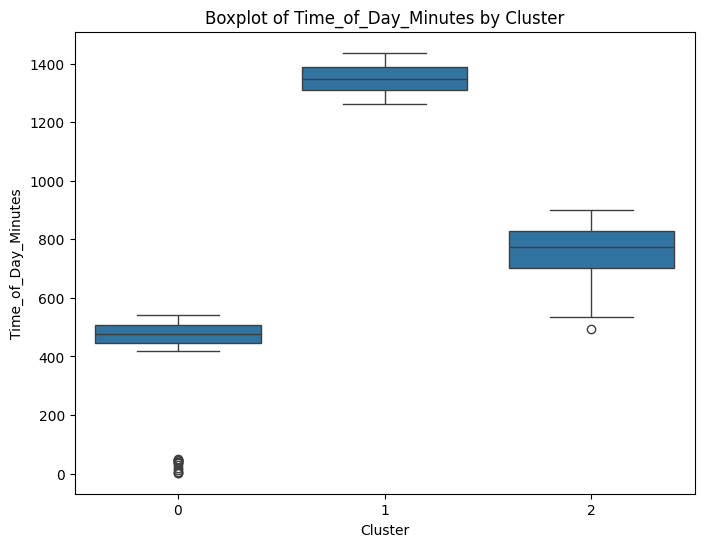

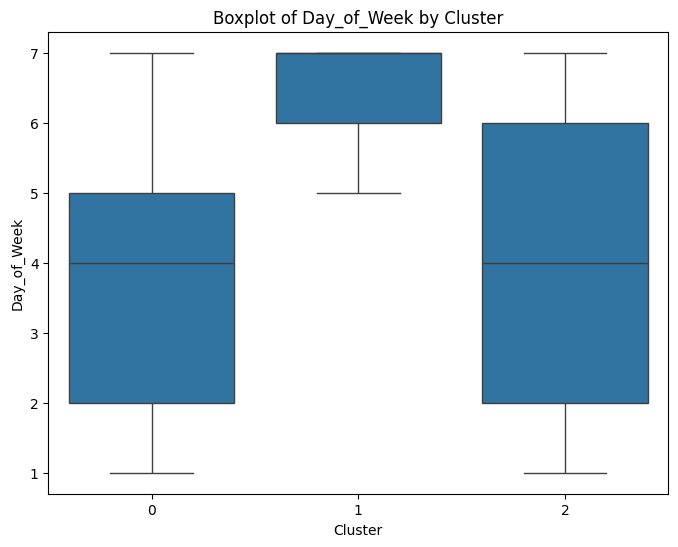

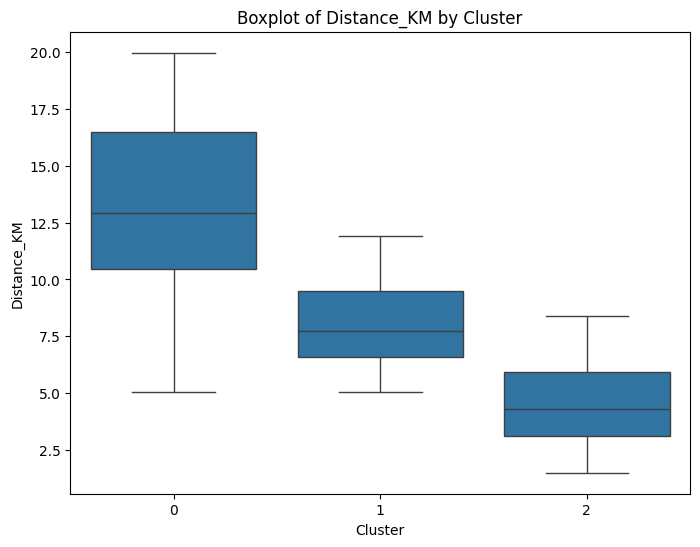

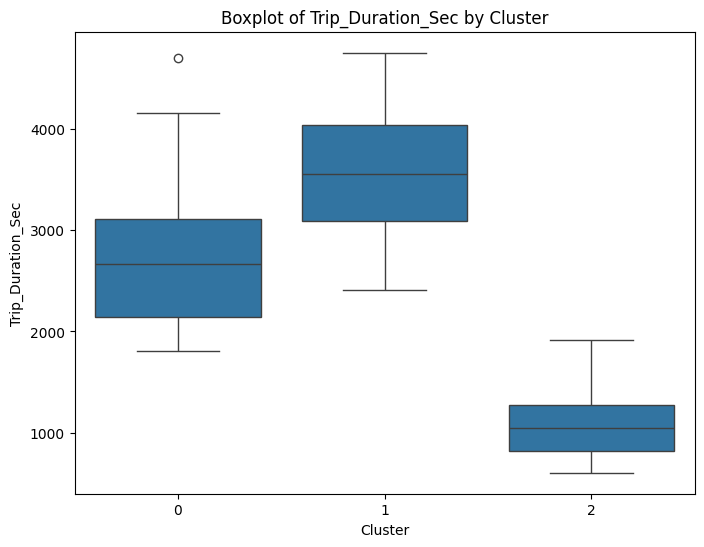

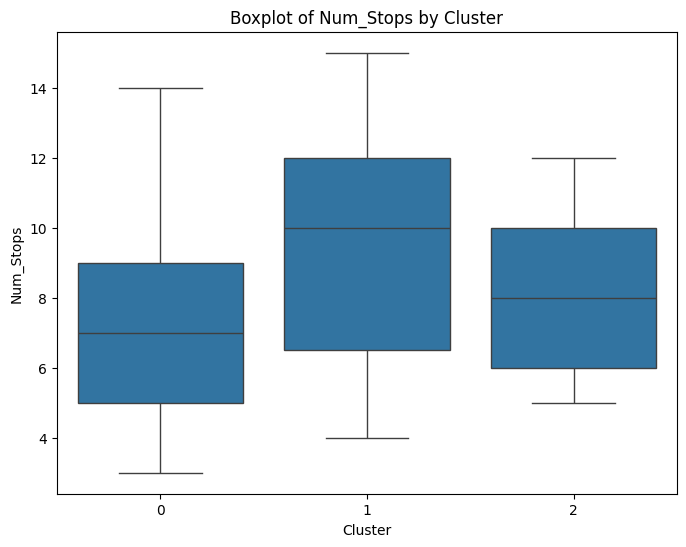

In [12]:
# Create boxplots to visualize the distribution of key features across clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Identify key features to visualize
df.drop(columns=["Trip_ID"])
key_features =df.drop(columns=["Trip_ID", "Cluster"]).columns.tolist()

# Create boxplots for each key feature
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Following visualisation of the distribution of key / numeric features, the clusters are primarily distingushed by the time of day, distance travelled and duration of trips: 
1. Clustter 0: Morning commuters, who travel the furtherest but with fewer stops (likely express transit) and therefore not the longest trip durations. 

2. Cluster 1: Late night commuters, who dont travel as far as morning commuters but utilise the non-express option (mode of transit stopping at all stops), and as a result, taking the longest trip durations. Travel heavily focused Friday to Saturday.

3. CLuster 2: These commuters avoid the morning rush hours and take short trips (based on distance and duration).